<a href="https://colab.research.google.com/github/rivalsolmons/BTP/blob/main/Cost_dataset_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Effort and cost Estimation in Agile Software Development

In [4]:
#@title Cost Estimation on Zia 
import math
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from matplotlib.colors import ListedColormap  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

from sklearn.metrics import classification_report



In [5]:
from google.colab import drive
drive.mount('/content/drive')

data_read = pd.read_csv('/content/drive/MyDrive/Btp/Ultra/Zia_upd2.csv')

Mounted at /content/drive


In [6]:
data_read.head()

,Effort,Vi,D,V,Sprint_Size,Work_days,Team_Salary,Act_Time,Actual_Cost
0,156,4.2,0.687,2.7,10,22,230000,63,1200000
1,202,3.7,0.701,2.5,10,21,260000,92,1600000
2,173,4.0,0.878,3.3,10,22,250000,56,1000000
3,331,4.5,0.886,3.8,10,22,300000,86,2100000
4,124,4.9,0.903,4.2,10,22,300000,32,750000


In [7]:
#@title Improving The data Qualitity 
#@markdown  

In [8]:
#@title Defining Category 1 and Category 2


features = ['Effort'	,'Vi',	'D',	'V',	'Sprint_Size',	'Work_days',	'Team_Salary',	'Act_Time']
#features = ['Actual_Cost',	'Vi',	'D',	'V',	'Sprint_Size',	'Work_days',	'Act_Time']



Cat_1 = data_read[features]
Cat_2 = data_read['Actual_Cost']

In [9]:

#@title Describing Categorical Data 
Cat_1.describe()


,Effort,Vi,D,V,Sprint_Size,Work_days,Team_Salary,Act_Time
count,21.000000,21.000000,21.000000,21.000000,21.0,21.000000,21.000000,21.000000
mean,163.714286,4.071429,0.780381,3.023810,10.0,21.952381,246190.476190,56.428571
std,82.743062,0.325796,0.071028,0.438069,0.0,0.218218,46419.413016,26.177417
min,62.000000,3.700000,0.646000,2.400000,10.0,21.000000,190000.000000,21.000000
25%,101.000000,3.900000,0.742000,2.800000,10.0,22.000000,220000.000000,35.000000
50%,137.000000,4.000000,0.758000,2.900000,10.0,22.000000,250000.000000,52.000000
75%,211.000000,4.200000,0.833000,3.200000,10.0,22.000000,250000.000000,80.000000
max,339.000000,4.900000,0.903000,4.200000,10.0,22.000000,400000.000000,112.000000


In [10]:
#For debugging purpose
#print(Cat_1)

In [11]:
#@title Describe the raw Data of splitted trained set from the dataframe
display(Cat_1)

,Effort,Vi,D,V,Sprint_Size,Work_days,Team_Salary,Act_Time
0,156,4.2,0.687,2.7,10,22,230000,63
1,202,3.7,0.701,2.5,10,21,260000,92
2,173,4.0,0.878,3.3,10,22,250000,56
3,331,4.5,0.886,3.8,10,22,300000,86
4,124,4.9,0.903,4.2,10,22,300000,32
5,339,4.1,0.903,3.6,10,22,400000,91
6,97,4.2,0.859,3.4,10,22,250000,35
7,257,3.8,0.833,3.0,10,22,250000,93
8,84,3.9,0.646,2.4,10,22,190000,36
9,211,4.6,0.758,3.2,10,22,250000,62


In [12]:
print('The overall nummber of projects are: ',len(Cat_2))

The overall nummber of projects are:  21


In [13]:
display(Cat_2)

0     1200000
1     1600000
2     1000000
3     2100000
4      750000
5     3200000
6      600000
7     1800000
8      500000
9     1200000
10     800000
11     650000
12     600000
13     400000
14     350000
15    2000000
16     800000
17    1000000
18    1500000
19     800000
20     550000
Name: Actual_Cost, dtype: int64

In [14]:


from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(Cat_1,Cat_2,test_size=0.20, random_state=0)
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(x_train,y_train)
ml.predict(x_test)
y_pred1 = ml.predict(x_test)

ypredx=len(x_test)
## For Debugging Purpose


# print(len(y_pred1))
# print('xtrain',len(x_train))
# print('xtest',len(x_test))

In [15]:
import math
print(y_test)


8      500000
13     400000
20     550000
1     1600000
11     650000
Name: Actual_Cost, dtype: int64


In [16]:
print(y_pred1)

[ 519105.92988322  324019.47957282  678543.59988735 1752066.93586321
  547413.02801057]


In [17]:
ml.predict(x_train)
x_train_pred_lr= ml.predict(x_train)

In [18]:

from sklearn.metrics import r2_score


import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math



print('r2 Score::',r2_score(y_test,y_pred1))
print("Mean Absolute Diffrence:::",np.mean(abs(y_test-y_pred1)))
print('MAE', mean_absolute_error(y_test,y_pred1))
print('MSE', mean_squared_error(y_test,y_pred1))
xv= math.sqrt(mean_squared_error(y_test,y_pred1))
print("Root Mean Squared Error::",xv)

r2 Score:: 0.9411599029071359
Mean Absolute Diffrence::: 95656.79161007726
MAE 95656.79161007726
MSE 11261994583.574192
Root Mean Squared Error:: 106122.5451239


Text(0.5, 1.0, 'Cost Actual vs Predicted Linear Regresssion')

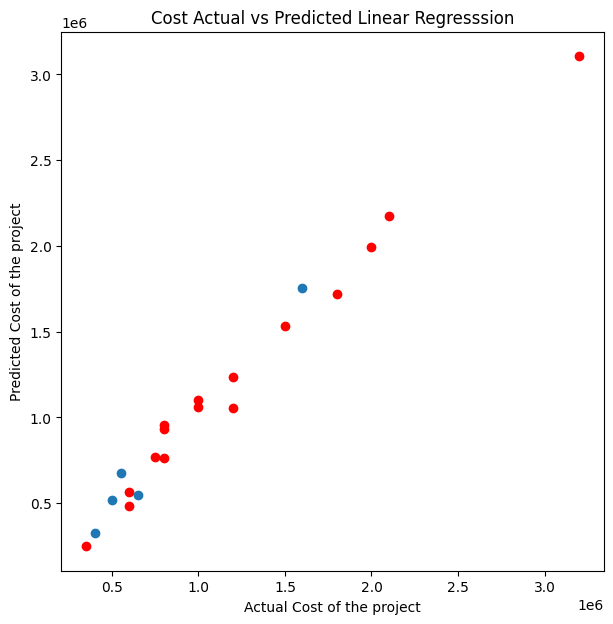

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.scatter(y_train, x_train_pred_lr ,label='Train Data',color='red' )
plt.scatter(y_test, y_pred1)


#plt.scatter()
plt.xlabel('Actual Cost of the project')
plt.ylabel('Predicted Cost of the project')
plt.title('Cost Actual vs Predicted Linear Regresssion')




In [20]:
arr =pd.DataFrame({'Actual  Cost':y_test })
arr1 =pd.DataFrame({'Predicted Cost':y_pred1})

# Now calculating Diffrence between actual and predicted Values

In [21]:
import pandas as pd
pred_y_diff = pd.DataFrame({'Actual Values of Cost':y_test,'Predicted Cost':y_pred1%10**5,'Difference':y_test-y_pred1})



pred_y_diff[0:21]


,Actual Values of Cost,Predicted Cost,Difference
8,500000,19105.929883,-19105.929883
13,400000,24019.479573,75980.520427
20,550000,78543.599887,-128543.599887
1,1600000,52066.935863,-152066.935863
11,650000,47413.028011,102586.971989


In [22]:
#arr = pred_y_diff.to_numpy()
arr =pd.DataFrame({'Actual  Cost':y_test })
arr1 =pd.DataFrame({'Predicted Cost':y_pred1})
arr2 =pd.DataFrame({'Difference':y_test-y_pred1})

In [23]:

print(arr)

    Actual  Cost
8         500000
13        400000
20        550000
1        1600000
11        650000


In [24]:
print(y_pred1)


[ 519105.92988322  324019.47957282  678543.59988735 1752066.93586321
  547413.02801057]


In [25]:
print(np.absolute(arr2))

       Difference
8    19105.929883
13   75980.520427
20  128543.599887
1   152066.935863
11  102586.971989


In [26]:
# The r_sq
print('The r Score on the predictrd trained Set: %.2f'% r2_score(y_test,y_pred1))

diff=np.absolute(y_test-y_pred1)
MRE=diff/y_test
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100
print("MMRE",MMRE)
print("MdMRE",MdMRE)
print("PRED 25%",Pred)

#linear

The r Score on the predictrd trained Set: 0.94
MMRE 0.1429493485321353
MdMRE 0.15782611075296318
PRED 25% 100.0


In [27]:
# @title KNeiboursRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

#print('x_train length :',len(x_train))
x_train,x_test,y_train,y_test = train_test_split(Cat_1,Cat_2, test_size=0.20, random_state=0)
#print(len(y_pred1))
#print('x_train length:',len(x_train))
#print('x_test length:',len(x_test))

neigh = KNeighborsRegressor(n_neighbors=2, weights='uniform')
neigh.fit(x_train,y_train)
y_pred=neigh.predict(x_test) 

#print(classification_report(y_test,y_pred))

#predict =neigh.predict(y_pred)
#print(neigh.score(y_test, y_pred))

import numpy as np
from sklearn.metrics import mean_absolute_error
#

print(len(y_pred))
print("Mean Absolute error:::",mean_absolute_error(y_test,y_pred))
#print("Mean Absolute error:::",np.sqrt(mean_absolute_error(y_test,y_pred)))


# The r_sq
print('The r Score on the predictrd trained Set: %.2f'% r2_score(y_test,y_pred))



#knn

5
Mean Absolute error::: 195000.0
The r Score on the predictrd trained Set: 0.68


<function matplotlib.pyplot.show(close=None, block=None)>

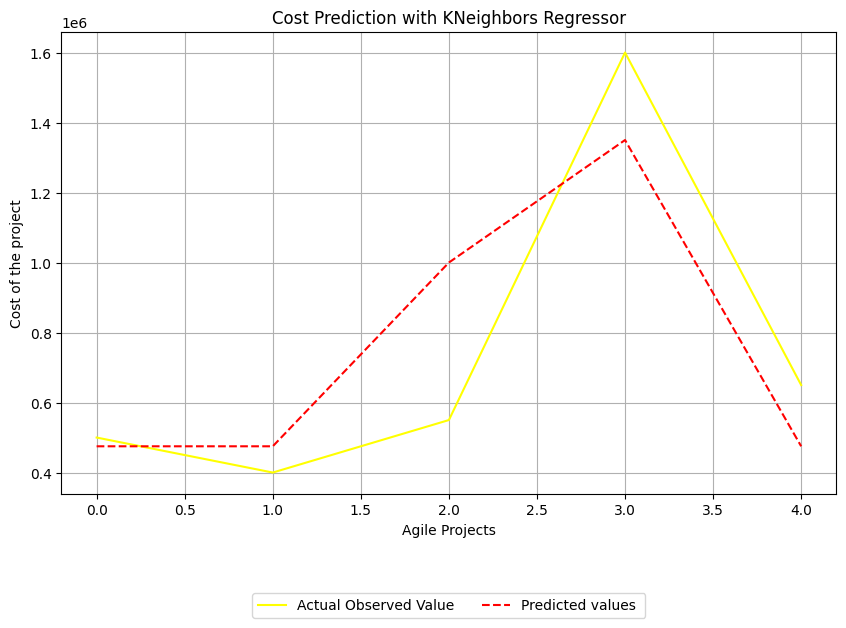

In [28]:
 #plotting the observed and predicted values 


# Setting the boundaries and parameters

plt.rcParams['figure.figsize'] = (10,6)
x_ax =range(len(x_test))
#x_ax2 =range(len(y_test))
#plotting 
plt.plot(x_ax, y_test , label='Actual Observed Value', color='yellow',linestyle='-')
plt.plot(x_ax,y_pred , label='Predicted values ' , color='red' , linestyle ='--')
plt.grid()
plt.xlabel('Agile Projects')
plt.ylabel('Cost of the project')
plt.title('Cost Prediction with KNeighbors Regressor')
plt.legend(bbox_to_anchor =(0.5,-0.2), loc= 'upper center',ncol=2, frameon = True)

plt.show

In [29]:
#
diff=np.absolute(y_test-y_pred)
MRE=diff/y_test
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100
print("MMRE",MMRE)
print("MdMRE",MdMRE)
print("PRED 25%",Pred)

MMRE 0.29623251748251744
MdMRE 0.1875
PRED 25% 60.0


In [30]:
import pandas as pd

pred_y_diff = pd.DataFrame({'Actual Values of Cost':y_test,'Predicted Cost':y_pred,'Difference':y_test-y_pred})
xyy=pred_y_diff.Difference.abs()
pred_y_diff[0:21]

,Actual Values of Cost,Predicted Cost,Difference
8,500000,475000.0,25000.0
13,400000,475000.0,-75000.0
20,550000,1000000.0,-450000.0
1,1600000,1350000.0,250000.0
11,650000,475000.0,175000.0


In [31]:
pred_mre = pd.DataFrame({'Actual Values of Cost':y_test,'Predicted Cost':y_pred,'MRE':(y_test-y_pred)/y_test})


pred_mre[0:21]

,Actual Values of Cost,Predicted Cost,MRE
8,500000,475000.0,0.050000
13,400000,475000.0,-0.187500
20,550000,1000000.0,-0.818182
1,1600000,1350000.0,0.156250
11,650000,475000.0,0.269231


----------------------------

Decision Tree Implementation

## Decision Tree Implementation 

In [32]:
data_read.head()

,Effort,Vi,D,V,Sprint_Size,Work_days,Team_Salary,Act_Time,Actual_Cost
0,156,4.2,0.687,2.7,10,22,230000,63,1200000
1,202,3.7,0.701,2.5,10,21,260000,92,1600000
2,173,4.0,0.878,3.3,10,22,250000,56,1000000
3,331,4.5,0.886,3.8,10,22,300000,86,2100000
4,124,4.9,0.903,4.2,10,22,300000,32,750000


In [33]:
#Now to Prepare the Input and Output Features
X= data_read.drop(['Effort'],axis=1)
X.shape

(21, 8)

In [34]:
#Splitting the dataset into Trainingfset and test set

#Splitting the dataset
X_train,X_test,y_train,y_test = train_test_split(Cat_1,Cat_2, test_size=0.20 ,random_state=0)


In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
#Creating and Fitting the model
regressor1 = DecisionTreeRegressor().fit(X_train,y_train)

In [36]:
#The Coeffitient of Detern=mination 
print('Training R_sq is : %.2f'% regressor1.score(X_train,y_train))

Training R_sq is : 1.00


In [37]:
# For the training model EVALUATION
from  sklearn.metrics import mean_absolute_error , mean_squared_error, explained_variance_score , r2_score

In [38]:
#prediction on the training Dataset
y_train_pred = regressor1.predict(X_train)



In [39]:

# The r_sq
print('The r_sq  is: %.2f'% r2_score(y_train,y_train_pred))

The r_sq  is: 1.00


In [40]:
#prediction on testing the data
y_test_pred_dt = regressor1.predict(X_test)
print("Mean Squared Error::",mean_squared_error(y_test,y_test_pred_dt))
print("Mean Absolute Error::",mean_absolute_error(y_test,y_test_pred_dt))
xv= math.sqrt(mean_squared_error(y_test,y_test_pred_dt))
print("Root Mean Squared Error::",xv)

Mean Squared Error:: 15500000000.0
Mean Absolute Error:: 110000.0
Root Mean Squared Error:: 124498.99597988732


In [41]:
# The r_sq
print('The r Score on the predictrd trained Set: %.2f'% r2_score(y_test,y_test_pred_dt))

diff=np.absolute(y_test-y_test_pred_dt)
MRE=diff/y_test
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100
print("MMRE",MMRE)
print("MdMRE",MdMRE)
print("PRED 25%",Pred)



The r Score on the predictrd trained Set: 0.92
MMRE 0.1543356643356643
MdMRE 0.125
PRED 25% 100.0


<function matplotlib.pyplot.show(close=None, block=None)>

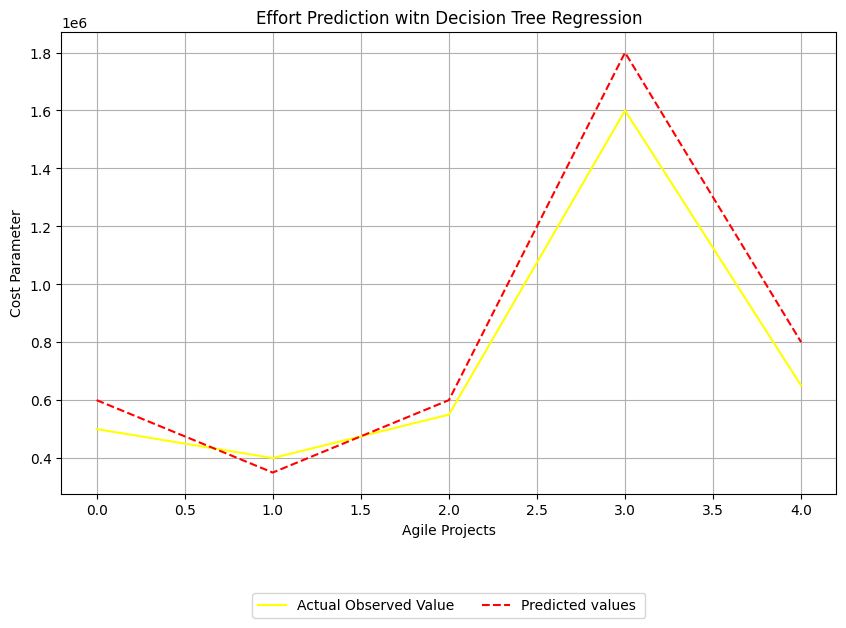

In [42]:
# plotting the observed and predicted values 


# Setting the boundaries and parameters

plt.rcParams['figure.figsize'] = (10,6)
x_ax =range(len(X_test))
#x_ax2 =range(len(y_test))
#plotting 
plt.plot(x_ax, y_test , label='Actual Observed Value', color='yellow',linestyle='-')
plt.plot(x_ax,y_test_pred_dt , label='Predicted values ' , color='red' , linestyle ='--')
plt.grid()
plt.xlabel('Agile Projects')
plt.ylabel('Cost Parameter')
plt.title('Effort Prediction witn Decision Tree Regression')
plt.legend(bbox_to_anchor =(0.5,-0.2), loc= 'upper center',ncol=2, frameon = True)

plt.show

In [43]:
pred_mre = pd.DataFrame({'Actual Values of Effort':y_test,'Predicted Effort':y_test_pred_dt,'MRE':(y_test-y_test_pred_dt)/y_test})
#rel=(xyy/5)
#print(sum(rel)/5)
pred_mre[0:21]

,Actual Values of Effort,Predicted Effort,MRE
8,500000,600000.0,-0.200000
13,400000,350000.0,0.125000
20,550000,600000.0,-0.090909
1,1600000,1800000.0,-0.125000
11,650000,800000.0,-0.230769


In [44]:
import pandas as pd
pred_y_diff = pd.DataFrame({'Actual Values of Effort':y_test,'Predicted Effort':y_test_pred_dt,'Difference':y_test-y_test_pred_dt})

pred_y_diff[0:21]

,Actual Values of Effort,Predicted Effort,Difference
8,500000,600000.0,-100000.0
13,400000,350000.0,50000.0
20,550000,600000.0,-50000.0
1,1600000,1800000.0,-200000.0
11,650000,800000.0,-150000.0


In [45]:
#@title Random Forest Regresssor Implementation
from sklearn.model_selection  import train_test_split
X_train,X_test,y_train,y_test = train_test_split(Cat_1,Cat_2, test_size=0.20 ,random_state=0)

In [46]:
from sklearn.ensemble import RandomForestRegressor
model2= RandomForestRegressor(n_estimators=30, random_state=30)

In [47]:
#Fitting the  model 
LL_rf = model2.fit(X_train,y_train)


In [48]:
#prediction on testing the data
y_test_pred_rf = model2.predict(X_test)

In [49]:
#Training Model Evaluation


print('The Model Score on the predictrd training Set: %.2f'% LL_rf.score(X_train,y_train))
print('r2 Score ', r2_score(y_test,y_test_pred_rf))

The Model Score on the predictrd training Set: 0.97
r2 Score  0.9819110646696854


In [50]:
# print("Mean Squared Error::",mean_squared_error(y_test,y_test_pred_rf))
# print("Mean Absolute Error::",mean_absolute_error(y_test,y_test_pred_rf))
# xv= math.sqrt(mean_squared_error(y_test,y_test_pred_rf))
# print("Root Mean Squared Error::",xv)

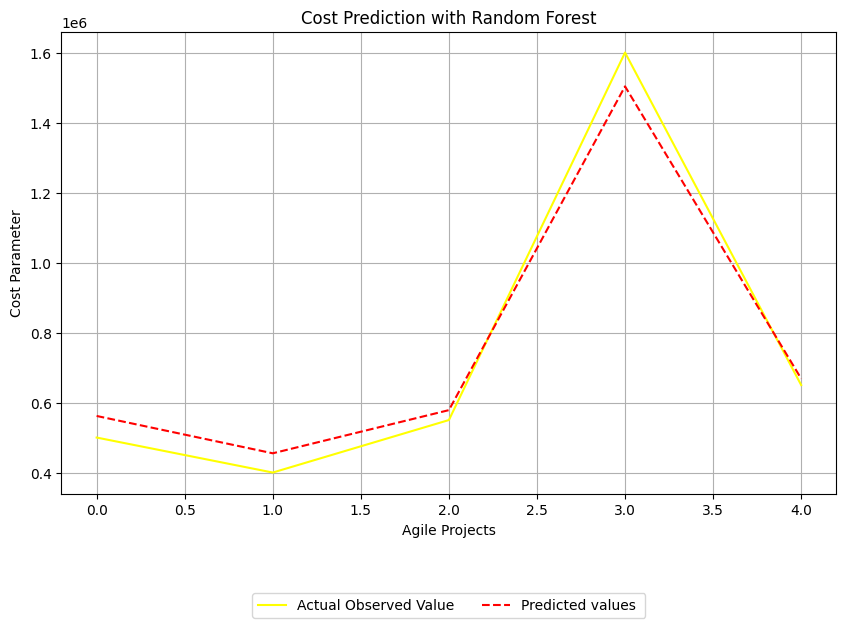

In [51]:
# plotting the observed and predicted values 


# Setting the boundaries and parameters

plt.rcParams['figure.figsize'] = (10,6)
x_ax =range(len(X_test))

#plotting 
plt.plot(x_ax, y_test , label='Actual Observed Value', color='yellow',linestyle='-')
plt.plot(x_ax,y_test_pred_rf , label='Predicted values ' , color='red' , linestyle ='--')
plt.grid()
plt.xlabel('Agile Projects')
plt.ylabel('Cost Parameter')
plt.title('Cost Prediction with Random Forest')
plt.legend(bbox_to_anchor =(0.5,-0.2), loc= 'upper center',ncol=2, frameon = True)

In [52]:
pred_mre = pd.DataFrame({'Actual Values of Cost':y_test,'Predicted Cost':y_test_pred_rf,'MRE':(y_test-y_test_pred_rf)/y_test})
#rel=(xyy/5)
#print(sum(rel)/5)
pred_mre[0:21]

,Actual Values of Cost,Predicted Cost,MRE
8,500000,5.616667e+05,-0.123333
13,400000,4.550000e+05,-0.137500
20,550000,5.783333e+05,-0.051515
1,1600000,1.503333e+06,0.060417
11,650000,6.683333e+05,-0.028205


Evaluation Parameters

In [53]:

# The r_sq
print('The r Score on the predictrd trained Set: %.2f'% r2_score(y_test,y_test_pred_rf))

diff=np.absolute(y_test-y_test_pred_rf)
MRE=diff/y_test
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100
print("MMRE",MMRE)
print("MdMRE",MdMRE)
print("PRED 25%",Pred)

#

The r Score on the predictrd trained Set: 0.98
MMRE 0.08019405594405596
MdMRE 0.060416666666666716
PRED 25% 100.0


# Our rbf Kernel

In [54]:
def RBF(X, gamma):
    
    # Free parameter gamma
    if gamma == None:
        gamma = 1.0/X.shape[1]
        
    # RBF kernel Equation
    K = np.exp(-gamma * np.sum((X - X[:,np.newaxis])**2, axis = -1))
    
    return K

In [55]:
#@title ADA BOOST
from sklearn.ensemble import AdaBoostRegressor


# Categorical To continious 
X_train_ada,X_test_ada,y_train_ada,y_test_ada = train_test_split(Cat_1,Cat_2, test_size=0.20, random_state=0)


ada = AdaBoostRegressor()
ada.fit(X_train_ada,y_train_ada)

#clf = svm.SVC()
#clf.fit(Cat_1, Cat_2)
y_train_pred_ada=ada.predict(X_train_ada)
y_pred_ada=ada.predict(X_test_ada)



# The r_sq
print('The r Score on the predictrd test Set: %.2f'% r2_score(y_test_ada,y_pred_ada))
print('The r Score on the predictrd trained Set: %.2f'% r2_score(y_train_ada,y_train_pred_ada))

diff=np.absolute(y_test_ada-y_pred_ada)
MRE=diff/y_test_ada
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100
print("MMRE",MMRE)
print("MdMRE",MdMRE)
print("PRED 25%",Pred)

#


The r Score on the predictrd test Set: 0.93
The r Score on the predictrd trained Set: 1.00
MMRE 0.20708916083916082
MdMRE 0.2
PRED 25% 80.0


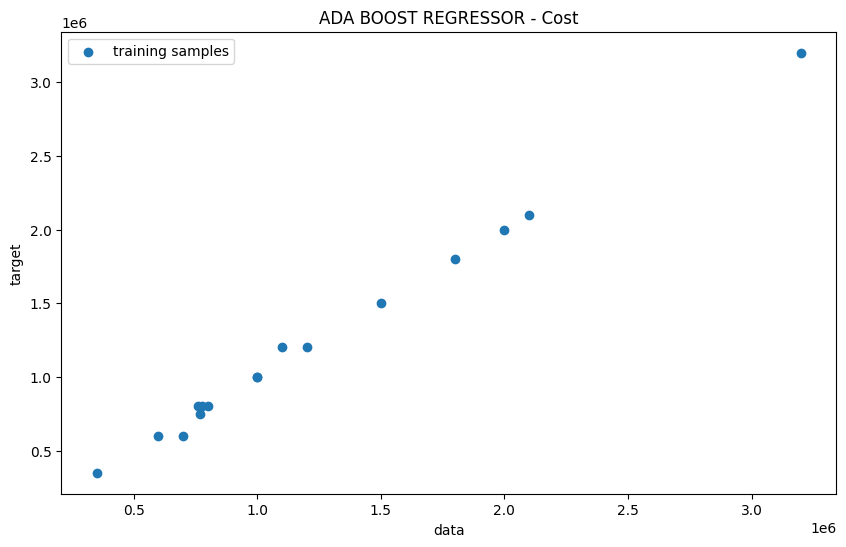

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette("colorblind")
# X_train_ada,X_test_ada,y_train_ada,y_test_ada
plt.figure()
plt.scatter(y_train_pred_ada,y_train_ada , label="training samples")
#plt.plot(X_test_ada,y_test_ada, color=colors[1], label="n_estimators=1", linewidth=2)
# plt.plot(X, y_2, color=colors[2], label="n_estimators=300", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("ADA BOOST REGRESSOR - Cost")
plt.legend()
plt.show()

In [ ]:
#prediction on testing the data
#y_test_pred_svm = y_pred111.predict(y_test,y_test_pred_svm)

In [ ]:
import pandas as pd
pred_y_diff = pd.DataFrame({'Actual Values of Effort':y_test,'Predicted Effort':y_pred_svm,'Difference':y_test-y_pred_svm})

pred_y_diff[0:21]

In [ ]:
# plotting the observed and predicted values 


# Setting the boundaries and parameters

plt.rcParams['figure.figsize'] = (10,6)
x_ax =range(len(X_test))

#plotting 
plt.plot(x_ax, y_test , label='Actual Observed Value', color='yellow',linestyle='-')
plt.plot(x_ax,y_pred_svm , label='Predicted values ' , color='red' , linestyle ='--')
plt.grid()

plt.legend(bbox_to_anchor =(0.5,-0.2), loc= 'upper center',ncol=2, frameon = True)
plt.show()

In [ ]:
#@title Ensemble Learning 

data_read.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# encoder = LabelEncoder()

# data_read['Actual_Cost'] = encoder.fit_transform(data_read['Actual_Cost'])

In [ ]:
dff = data_read.sample(21)
dff_train = dff.iloc[:14,:].sample(10)
dff_val = dff.iloc[14:18,:].sample(4)
dff_test = dff.iloc[17:,:].sample(3)

In [ ]:
dff_train

In [ ]:
X_test = dff_val.iloc[:,0:8].values
y_test = dff_val.iloc[:-1].values

# len(X_test)
# len(y_test)


In [ ]:
#@title Bagging with 3 Decision Trees 
df_bag = dff_train.sample(7,replace=True) 

X= df_bag.iloc[:,0:8]
Y= df_bag.iloc[:,-1]

df_bag

In [ ]:
X

In [ ]:
Y

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score 

In [ ]:
def evaluate(clf,X,Y):
  clf.fit(X,Y)
  plot_tree(clf)
  plt.show()
  # plot_decision_regions(X.values,Y.values, clf=clf , legend=2)
  y_pred=clf.predict(X_test)
  y_pred
  #print(accuracy_score(y_test,y_pred))

In [ ]:
#@title Default title text
dt_bag1 = DecisionTreeRegressor()
dt_bag11 = DecisionTreeClassifier()
#

We're adding out Bag 1 to make a low bias and high variance model

In [ ]:
# Decision tree Classifier 

evaluate(dt_bag11,X,Y)

In [ ]:
#accuracy_score(y_pred,y_test)

In [ ]:
evaluate(dt_bag1,X,Y)

In [ ]:
#@title Bagging with 3 Decision Trees 
df_bag = dff_train.sample(7,replace=True) 

X= df_bag.iloc[:,0:8]
Y= df_bag.iloc[:,-1]

df_bag

In [ ]:
X

In [ ]:
Y

In [ ]:
#@title Bagging with 3 Decision Trees 2nd Bag
df_bag2 = dff_train.sample(7,replace=True) 

X= df_bag2.iloc[:,0:8]
Y= df_bag2.iloc[:,-1]

df_bag

In [ ]:
dt_bag2 = DecisionTreeRegressor()
evaluate(dt_bag2,X,Y)

In [ ]:
dt_bag22 = DecisionTreeClassifier()
evaluate(dt_bag22,X,Y)

In [ ]:
#@title Bagging with 3 Decision Trees 3rd Bag
df_bag3 = dff_train.sample(7,replace=True) 

X= df_bag3.iloc[:,0:8]
Y= df_bag3.iloc[:,-1]

df_bag3

In [ ]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,Y)

In [ ]:
#@title Using Ensemble Technique 1st set of Algorithms

# 1
from sklearn.ensemble import BaggingRegressor



In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(Cat_1,Cat_2,test_size=0.25,random_state=0)

# now printing the overall sizes of our splitted result
print("Train / Test Sets sizes: ", x_train.shape,x_test.shape,y_train.shape,y_test.shape )

In [ ]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
knn = KNeighborsRegressor()

In [ ]:
lr.fit(X_train,Y_train)
dt.fit(X_train,Y_train)
knn.fit(X_train,Y_train)

In [ ]:
y_pred1 = lr.predict(X_test)
y_pred2 = dt.predict(X_test)
y_pred3 = knn.predict(X_test)

In [ ]:
print("R^2 score for LR",r2_score(Y_test,y_pred1))
print("R^2 score for DT",r2_score(Y_test,y_pred2))
print("R^2 score for KNN",r2_score(Y_test,y_pred3))

In [ ]:
from sklearn.ensemble import BaggingRegressor

bag_regressor = BaggingRegressor(random_state=1)
bag_regressor.fit(X_train, Y_train)

In [ ]:
Y_preds = bag_regressor.predict(X_test)

print('Training Coefficient of R^2 : %.3f'%bag_regressor.score(X_train, Y_train))
print('Test Coefficient of R^2 : %.3f'%bag_regressor.score(X_test, Y_test))

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
%%time

# n_samples = data_read.data.shape[0]
# n_features = data_read.data.shape[1]

params = {'base_estimator': [None, LinearRegression(), KNeighborsRegressor()],
          'n_estimators': [10,15,21],
          'max_samples': [0.5,0.95],
          'max_features': [0.5,1.0],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]}

bagging_regressor_grid = GridSearchCV(BaggingRegressor(random_state=1, n_jobs=-1), param_grid =params, cv=2, n_jobs=-1, verbose=1)
bagging_regressor_grid.fit(X_train, Y_train)

print('Train R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_train, Y_train))
print('Test R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_test, Y_test))
print('Best R^2 Score Through Grid Search : %.3f'%bagging_regressor_grid.best_score_)
print('Best Parameters : ',bagging_regressor_grid.best_params_)


     

In [ ]:
Y_test_pred_BAGGING= bagging_regressor_grid.predict(X_test)
Y_train_pred_BAGGING= bagging_regressor_grid.predict(X_train)

In [ ]:
Y_test_pred_BAGGING

In [ ]:
Y_train_pred_BAGGING

In [ ]:
#@title Evaluation results  Ensemble Learning Bagging - With Our Hybrid Approach using GridSearchCV 

diff=np.absolute(Y_test-Y_test_pred_BAGGING)
MRE=(diff/Y_test)/MRE.size
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100
print("MMRE",MMRE)
print("MdMRE",MdMRE)
print("PRED 25%",Pred)

In [ ]:
#@title Third Approach Using Ensemble Learning - Bagging with use of Bootstrapping 

 


In [ ]:
#@title Using Ensemble Technique Second set of Algorithms
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(Cat_1,Cat_2,test_size=0.30,random_state=0)

# now printing the overall sizes of our splitted result
print("Train / Test Sets sizes: ", x_train.shape,x_test.shape,y_train.shape,y_test.shape )

In [ ]:
rkf = RandomForestRegressor()
dt = DecisionTreeRegressor()
ada = AdaBoostRegressor()

In [ ]:
from logging import addLevelName
rkf.fit(X_train,Y_train)
dt.fit(X_train,Y_train)
ada.fit(X_train,Y_train)

In [ ]:
y_pred1 = rkf.predict(X_test)
y_pred2 = dt.predict(X_test)
y_pred3 = ada.predict(X_test)

In [ ]:
print("R^2 score for RF",r2_score(Y_test,y_pred1))
print("R^2 score for DT",r2_score(Y_test,y_pred2))
print("R^2 score for ADA_B",r2_score(Y_test,y_pred3))

In [ ]:
from sklearn.ensemble import BaggingRegressor

bag_regressor = BaggingRegressor(random_state=1)
bag_regressor.fit(X_train, Y_train)

In [ ]:
Y_preds = bag_regressor.predict(X_test)

print('Training Coefficient of R^2 : %.3f'%bag_regressor.score(X_train, Y_train))
print('Test Coefficient of R^2 : %.3f'%bag_regressor.score(X_test, Y_test))

In [ ]:
%%time

# n_samples = data_read.data.shape[0]
# n_features = data_read.data.shape[1]

params = {'base_estimator': [None, LinearRegression(), KNeighborsRegressor()],
          'n_estimators': [10,14,21],
          'max_samples': [0.5,1.0],
          'max_features': [0.5,1.0],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]}

bagging_regressor_grid = GridSearchCV(BaggingRegressor(random_state=1, n_jobs=-1), param_grid =params, cv=3, n_jobs=-1, verbose=1)
bagging_regressor_grid.fit(X_train, Y_train)

print('Train R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_train, Y_train))
print('Test R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_test, Y_test))
print('Best R^2 Score Through Grid Search : %.3f'%bagging_regressor_grid.best_score_)
print('Best Parameters : ',bagging_regressor_grid.best_params_)


     

In [ ]:
Y_test_pred_BAGGING= bagging_regressor_grid.predict(X_test)
Y_train_pred_BAGGING= bagging_regressor_grid.predict(X_train)

In [ ]:
Y_test_pred_BAGGING

In [ ]:
Y_train_pred_BAGGING

In [ ]:
#@title Evaluation results  Ensemble Learning Bagging - With Our Hybrid Approach using GridSearchCV 

diff=np.absolute(Y_test-Y_test_pred_BAGGING)
MRE=diff/Y_test
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100
print("MMRE",MMRE)
print("MdMRE",MdMRE)
print("PRED 25%",Pred)

In [ ]:
#@title Our Farzi Title 

In [ ]:
%%time

# n_samples = data_read.data.shape[0]
# n_features = data_read.data.shape[1]

params = {'base_estimator': [None, LinearRegression(), KNeighborsRegressor()],
          'n_estimators': [10,15,21],
          'max_samples': [0.5,1.0],
          'max_features': [0.5,1.0],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]}

bagging_regressor_grid = GridSearchCV(BaggingRegressor(random_state=1, n_jobs=-1), param_grid =params, cv=3, n_jobs=-1, verbose=1)
bagging_regressor_grid.fit(X_train, Y_train)

print('Train R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_train, Y_train))
print('Test R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_test, Y_test))
print('Best R^2 Score Through Grid Search : %.3f'%bagging_regressor_grid.best_score_)
print('Best Parameters : ',bagging_regressor_grid.best_params_)


     

In [ ]:
%%time

# n_samples = data_read.data.shape[0]
# n_features = data_read.data.shape[1]

params = {'base_estimator': [None, LinearRegression(), KNeighborsRegressor()],
          'n_estimators': [10,15,21],
          'max_samples': [0.5,1.0],
          'max_features': [0.5,1.0],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]}

bagging_regressor_grid = GridSearchCV(BaggingRegressor(random_state=1, n_jobs=-1), param_grid =params, cv=3, n_jobs=-1, verbose=1)
bagging_regressor_grid.fit(X_train, Y_train)

print('Train R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_train, Y_train))
print('Test R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_test, Y_test))
print('Best R^2 Score Through Grid Search : %.3f'%bagging_regressor_grid.best_score_)
print('Best Parameters : ',bagging_regressor_grid.best_params_)


     

In [ ]:
Y_test_pred_BAGGING= bagging_regressor_grid.predict(X_test)
Y_train_pred_BAGGING= bagging_regressor_grid.predict(X_train)

In [ ]:
Y_test_pred_BAGGING

In [ ]:
Y_train_pred_BAGGING

In [ ]:
#@title Evaluation results  Ensemble Learning Bagging - With Our Hybrid Approach using GridSearchCV 

diff=np.absolute(Y_test-Y_test_pred_BAGGING)
MRE=diff/Y_test
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100
print("MMRE",MMRE)
print("MdMRE",MdMRE)
print("PRED 25%",Pred)

In [ ]:
%%time

# n_samples = data_read.data.shape[0]
# n_features = data_read.data.shape[1]

params = {'base_estimator': [None,RandomForestRegressor(), DecisionTreeRegressor(), AdaBoostRegressor()],
          'n_estimators': [10,15,21],
          'max_samples': [0.5,1.0],
          'max_features': [0.5,8],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]}

bagging_regressor_grid = GridSearchCV(BaggingRegressor(random_state=1, n_jobs=-1), param_grid =params, cv=3, n_jobs=-1, verbose=1)
bagging_regressor_grid.fit(X_train, Y_train)

print('Train R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_train, Y_train))
print('Test R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_test, Y_test))
print('Best R^2 Score Through Grid Search : %.3f'%bagging_regressor_grid.best_score_)
print('Best Parameters : ',bagging_regressor_grid.best_params_)


     

In [ ]:
Y_test_pred_BAGGING= bagging_regressor_grid.predict(X_test)
Y_train_pred_BAGGING= bagging_regressor_grid.predict(X_train)

In [ ]:
Y_test_pred_BAGGING

In [ ]:
Y_train_pred_BAGGING

In [ ]:
#@title Evaluation results  Ensemble Learning Bagging - With Our Hybrid Approach using GridSearchCV 

diff=np.absolute(Y_test-Y_test_pred_BAGGING)
MRE=diff/Y_test
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100
print("MMRE",MMRE)
print("MdMRE",MdMRE)
print("PRED 25%",Pred)

In [ ]:
#@title Decision tree
# from sklearn import svm
# from sklearn.tree import DecisionTreeRegressor

# #from sklearn.model_selection import train_test_split
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt


# data_read = pd.read_csv('Zia_upd22.csv')

# X = data_read.iloc[:,0:8].values
# y = data_read.iloc[:,:-1].values
# regressor = DecisionTreeRegressor(random_state =0)
# regressor.fit(X, y)




In [ ]:
# # @title Let Us calculate Estimated Cost With Raw Data
# x=regressor.predict([[154,4.2,0.77,2.7,12,22,310000,63]])
# print("Estimated Cost:",x[0]*100000)



In [ ]:
# #@title Decision Tree Regression 
# from sklearn.model_selection import train_test_split
# from sklearn import svm
# from sklearn.tree import DecisionTreeRegressor

# #from sklearn.model_selection import train_test_split
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt


# #data_read = pd.read_csv('Zia_upd22.csv')

# #X = data_read.iloc[:,1:8].values
# #y = data_read.iloc[:,-1].values
# #X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.20 )



In [ ]:
# X.shape

In [ ]:
# print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

In [ ]:
# regressor1 = DecisionTreeRegressor().fit(X_train,y_train)

#coefficient of determination 
# print('Training R_sq is : %.2f'% regressor1.score(X_train,y_train))

In [ ]:
# For the training model EVALUATION
# from  sklearn.metrics import mean_absolute_error , mean_squared_error, explained_variance_score , r2_score

In [ ]:
#Prediction on the training dataset
y_train_pred= regressor1.predict(X_train)
#y_train= regressor1.predict(X_train)

In [ ]:
# The r_sq
# print('The r_sq ,is :',r2_score(y_train,y_train_pred))

In [ ]:
# The MAE
print('The MAE is :  ', mean_absolute_error(y_train,y_train_pred))

In [ ]:
  # MSE 
  print('The MSE is :  ', mean_squared_error(y_train,y_train_pred))

In [ ]:
# RMSE 
print('The RMSE is :', np.sqrt(mean_squared_error(y_train,y_train_pred)))

In [ ]:
#Prediction on the testing Data
y_test_pred = regressor1.predict(X_test)
y_test = regressor1.predict(X_test)

Now Calculating r_score 

In [ ]:
# The r_sq
print('The r_sq y_test , y_test_pred is: %.2f'% r2_score(y_test,y_test_pred))

In [ ]:
# # plotting the observed and predicted values 


# # Setting the boundaries and parameters

# plt.rcParams['figure.figsize'] = (10,6)
# x_ax =range(len(X_test))

# #plotting 
# plt.plot(x_ax, y_test , label='Actual Observed Value', color='yellow',linestyle='-')
# plt.plot(x_ax,y_test_pred , label='Predicted values ' , color='red' , linestyle ='--')
# plt.grid()
# plt.ylabel('dcscfvfdscd')
# plt.xlabel('fffdcdcscfvfdscd')
# plt.legend(bbox_to_anchor =(0.5,-0.2), loc= 'upper center',ncol=2, frameon = True)

In [ ]:
from yellowbrick.regressor import PredictionError 
visualizer = PredictionError(regressor1)
visualizer.fit(X_train, y_train)
visualizer.fit(X_test,y_test)
visualizer.score(X_test,y_test)
visualizer.poof()

In [ ]:
# The MAE
print('The MAE is :  ', mean_absolute_error(y_test,y_test_pred ))

In [ ]:
#pip install yellowbrick

In [ ]:
# Residuals plot 
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(regressor1)
visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.poof()

In [ ]:
# testing the Model Evaluation



In [ ]:
# MAE 
print('The MAE is :%.2f'% mean_absolute_error(y_test,y_test_pred))

In [ ]:
# The MSE 
print('The MSE is : %.2f'% mean_squared_error(y_test,y_test_pred))

In [ ]:
print('The RMSE is : %.2f'% np.sqrt(mean_squared_error(y_test,y_test_pred)))

In [ ]:
# k-fold cross-validation
from sklearn.model_selection import cross_val_score

In [ ]:
#On the training Dataset
from sklearn.model_selection import cross_val_score
score_train = cross_val_score(regressor1,X_train,y_train,scoring = 'neg_mean_squared_error' , cv= 10)

In [ ]:
score_train

In [ ]:
score_train = np.mean(score_train)
print(score_train)

In [ ]:
# To make make it Positivme 
from numpy import absolute
score_train = absolute(score_train)
score_train

In [ ]:
# CV on thee testing data 
score_test = cross_val_score(regressor1, X_test, y_test, scoring ='neg_mean_squared_error' , cv= 5)

In [ ]:
print(score_test)

In [ ]:
#The Mean sCORE 
score_test = np.mean(score_test)
score_test

In [ ]:
import pandas as pd
pred_y_diff = pd.DataFrame({'Actual Values of Cost':y_test,'Predicted Cost':y_test_pred,'Difference':y_test-y_test_pred})

pred_y_diff[0:21]

# New Work 

In [ ]:
# Let us first import The



In [ ]:
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures()
#linear Equation of Degree two

Y=data_read.Actual_Cost
X_poly=pf.fit_transform(Cat_1)

ml.fit(X_poly,Y)



# x_train=data_read.drop('Actual_Cost',axis =1)
# y_train=data_read['Actual_Cost']

# x_test=test.drop('Actual_Cost',axis =1)
# y_test=test['Actual_Cost']


# x=x_test.as_matrix()
# y=y_test.as_matrix()


# yp=ml.predict(X_poly,Y)
# mean_absolute_error(y_test,yp)